In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from toygrad import MLP, Layer, Sigmoid, SoftMax, ReLU, TanH, Linear, SquaredError, BinaryCrossEntropy, AbsoluteError, CategoricalCrossEntropy
from plot import plot_metric, plot_categorical_decisions, plot_regression_decisions, plot_network

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (15,10)

CLF = "data/classification"
REG = "data/regression"
DATASET_SIZE = 500

def one_hot(y):
    y = y.astype(int) - 1
    if (y.max() == 1):
        # This means this is a binary class - we can use a single variable
        return np.reshape(y, (-1, 1))
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size),y] = 1
    return encoded

def read_data(path, categorical=False, normalize_inputs=False):
    def normalize(vector):
        return (vector - vector.min()) / (np.ptp(vector))
    assert not (categorical and normalize_inputs), "Cannot normalize categorical data"
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, :-1]
    Y = one_hot(data[:, -1]) if categorical else data[:, -1].reshape(-1, 1)
    if normalize_inputs:
        X, Y = normalize(X), normalize(Y)    
    return X, Y

# Classification

### Simple dataset

Simple dataset (train/test sample size 500)
Epoch   10
 BinaryCrossEntropy_train: 0.689
 BinaryCrossEntropy_train_std: 0.118
 BinaryCrossEntropy_test: 0.682
 BinaryCrossEntropy_test_std: 0.011
Epoch   20
 BinaryCrossEntropy_train: 0.655
 BinaryCrossEntropy_train_std: 0.114
 BinaryCrossEntropy_test: 0.646
 BinaryCrossEntropy_test_std: 0.031
Epoch   30
 BinaryCrossEntropy_train: 0.471
 BinaryCrossEntropy_train_std: 0.151
 BinaryCrossEntropy_test: 0.448
 BinaryCrossEntropy_test_std: 0.136
Epoch   40
 BinaryCrossEntropy_train: 0.226
 BinaryCrossEntropy_train_std: 0.193
 BinaryCrossEntropy_test: 0.208
 BinaryCrossEntropy_test_std: 0.185
Epoch   50
 BinaryCrossEntropy_train: 0.140
 BinaryCrossEntropy_train_std: 0.180
 BinaryCrossEntropy_test: 0.127
 BinaryCrossEntropy_test_std: 0.172


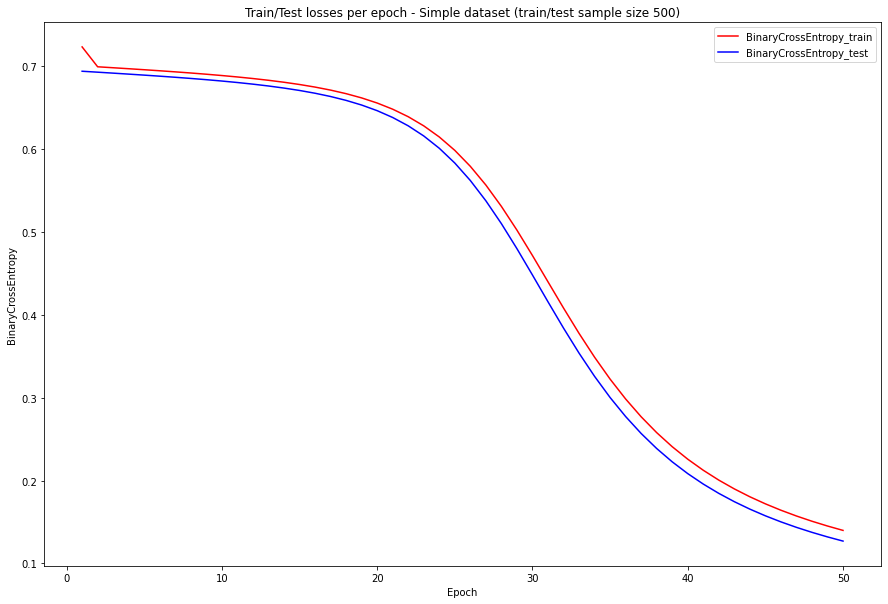

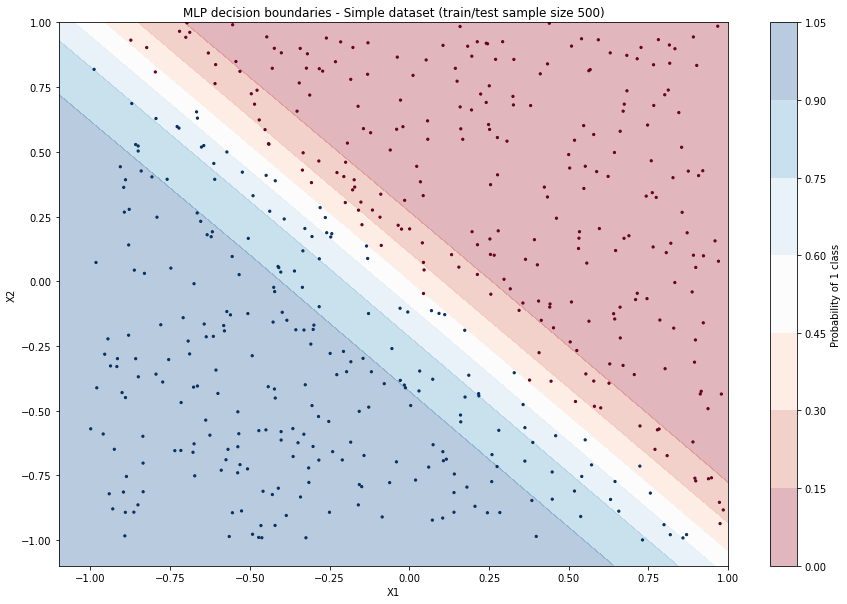

In [4]:
X, Y = read_data(f"{CLF}/data.simple.train.{DATASET_SIZE}.csv", categorical=True)
X_test, Y_test = read_data(f"{CLF}/data.simple.test.{DATASET_SIZE}.csv", categorical=True)

layers = [
    Layer(in_size=2, out_size=5, activ_function=Sigmoid),
    Layer(in_size=5, out_size=5, activ_function=Sigmoid),
    Layer(in_size=5, out_size=1, activ_function=Sigmoid),
]
print("=======================================================================================")
header = f"Simple dataset (train/test sample size {DATASET_SIZE})"
print(header)
print("=======================================================================================")
m = MLP(
    layers=layers,
    loss=BinaryCrossEntropy,
    bias=True,
    batch_size=16,
    epochs=50,
    momentum=0.001,
    learning_rate=0.5,
)
stats = m.train(X,Y, X_test, Y_test)
plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}", binary=True)

### Three Gauss dataset

Three Gauss dataset (train/test sample size 500)
Epoch   10
 CategoricalCrossEntropy_train: 1.101
 CategoricalCrossEntropy_train_std: 0.073
 CategoricalCrossEntropy_test: 1.096
 CategoricalCrossEntropy_test_std: 0.020
Epoch   20
 CategoricalCrossEntropy_train: 1.096
 CategoricalCrossEntropy_train_std: 0.074
 CategoricalCrossEntropy_test: 1.090
 CategoricalCrossEntropy_test_std: 0.021
Epoch   30
 CategoricalCrossEntropy_train: 1.089
 CategoricalCrossEntropy_train_std: 0.076
 CategoricalCrossEntropy_test: 1.083
 CategoricalCrossEntropy_test_std: 0.025
Epoch   40
 CategoricalCrossEntropy_train: 1.080
 CategoricalCrossEntropy_train_std: 0.079
 CategoricalCrossEntropy_test: 1.074
 CategoricalCrossEntropy_test_std: 0.035
Epoch   50
 CategoricalCrossEntropy_train: 1.067
 CategoricalCrossEntropy_train_std: 0.085
 CategoricalCrossEntropy_test: 1.061
 CategoricalCrossEntropy_test_std: 0.050
Epoch   60
 CategoricalCrossEntropy_train: 1.044
 CategoricalCrossEntropy_train_std: 0.100
 CategoricalCro

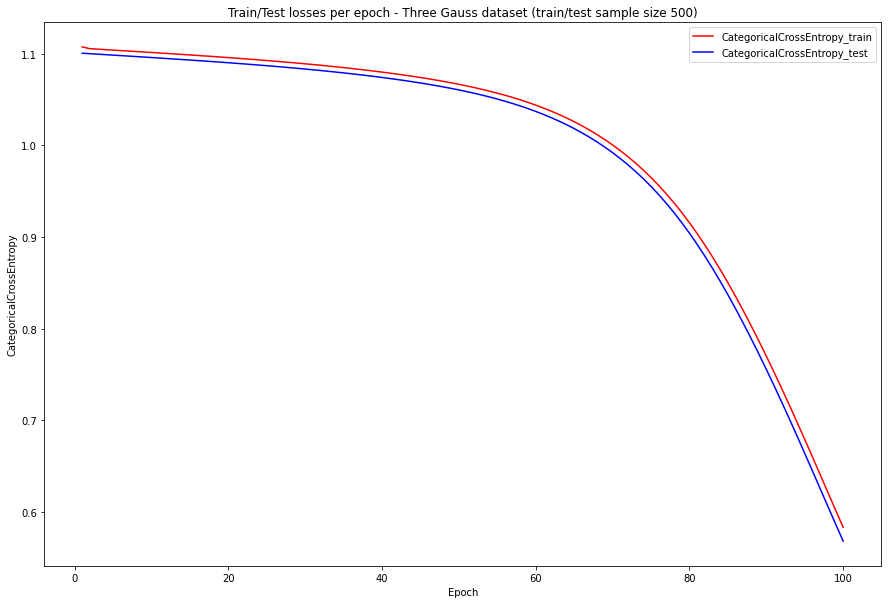

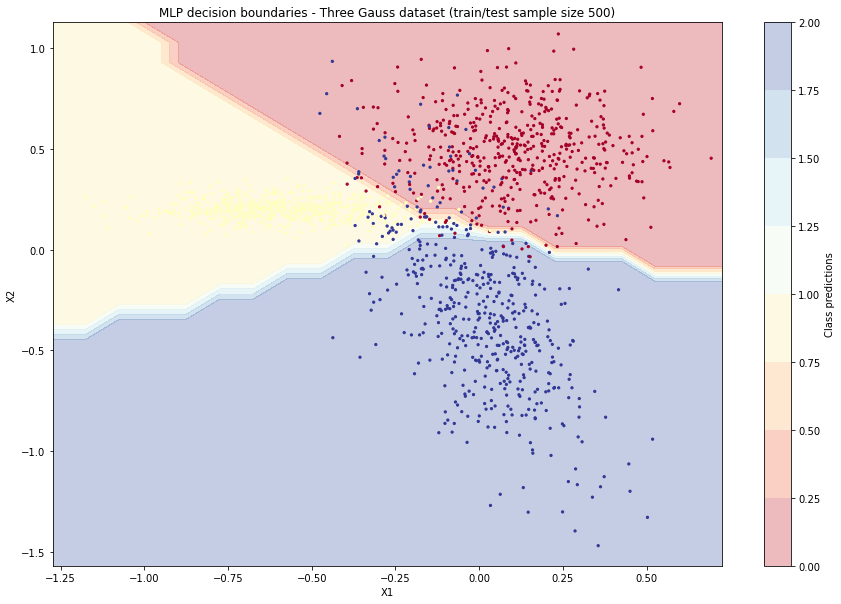

In [5]:
X, Y = read_data(f"{CLF}/data.three_gauss.train.{DATASET_SIZE}.csv", categorical=True)
X_test, Y_test = read_data(f"{CLF}/data.three_gauss.test.{DATASET_SIZE}.csv", categorical=True)
layers = [
    Layer(in_size=2, out_size=5, activ_function=Sigmoid),
    Layer(in_size=5, out_size=5, activ_function=Sigmoid),
    Layer(in_size=5, out_size=3, activ_function=SoftMax),
]
print("=======================================================================================")
header = f"Three Gauss dataset (train/test sample size {DATASET_SIZE})"
print(header)
print("=======================================================================================")
m = MLP(
    layers=layers,
    loss=CategoricalCrossEntropy,
    bias=True,
    batch_size=16,
    epochs=100,
    momentum=0.1,
    learning_rate=0.2,
)
stats = m.train(X,Y, X_test, Y_test)
plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}")

# Regression

### Activation dataset

Activation dataset (train/test sample size 500)
Epoch   10
 AbsoluteError_train: 20.499
 AbsoluteError_train_std: 17.124
 AbsoluteError_test: 38.757
 AbsoluteError_test_std: 33.111
Epoch   20
 AbsoluteError_train: 7.665
 AbsoluteError_train_std: 6.039
 AbsoluteError_test: 17.654
 AbsoluteError_test_std: 16.113
Epoch   30
 AbsoluteError_train: 3.071
 AbsoluteError_train_std: 3.153
 AbsoluteError_test: 10.959
 AbsoluteError_test_std: 12.775
Epoch   40
 AbsoluteError_train: 1.871
 AbsoluteError_train_std: 1.831
 AbsoluteError_test: 8.384
 AbsoluteError_test_std: 10.902
Epoch   50
 AbsoluteError_train: 1.298
 AbsoluteError_train_std: 1.237
 AbsoluteError_test: 6.987
 AbsoluteError_test_std: 9.827
Epoch   60
 AbsoluteError_train: 0.957
 AbsoluteError_train_std: 0.898
 AbsoluteError_test: 6.115
 AbsoluteError_test_std: 9.148
Epoch   70
 AbsoluteError_train: 0.733
 AbsoluteError_train_std: 0.679
 AbsoluteError_test: 5.526
 AbsoluteError_test_std: 8.692
Epoch   80
 AbsoluteError_train: 0.579
 

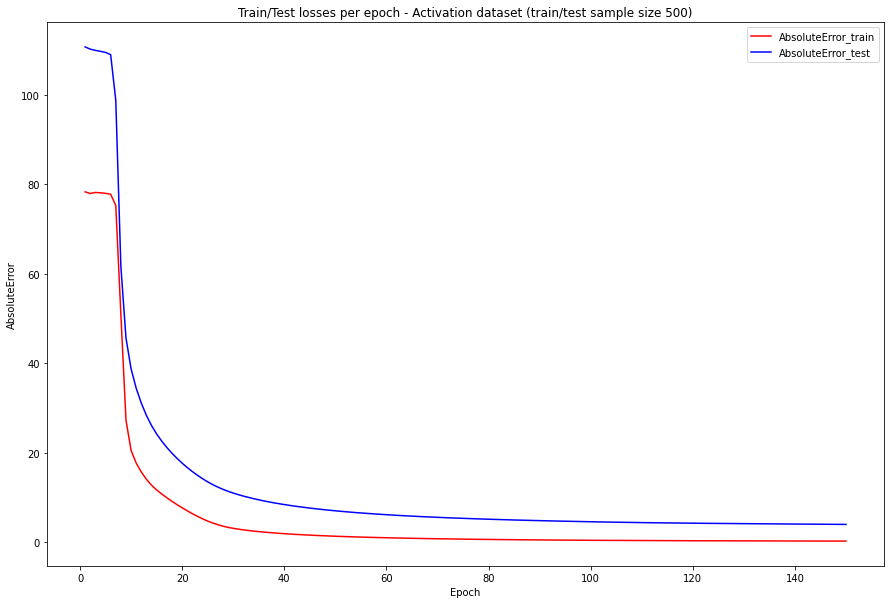

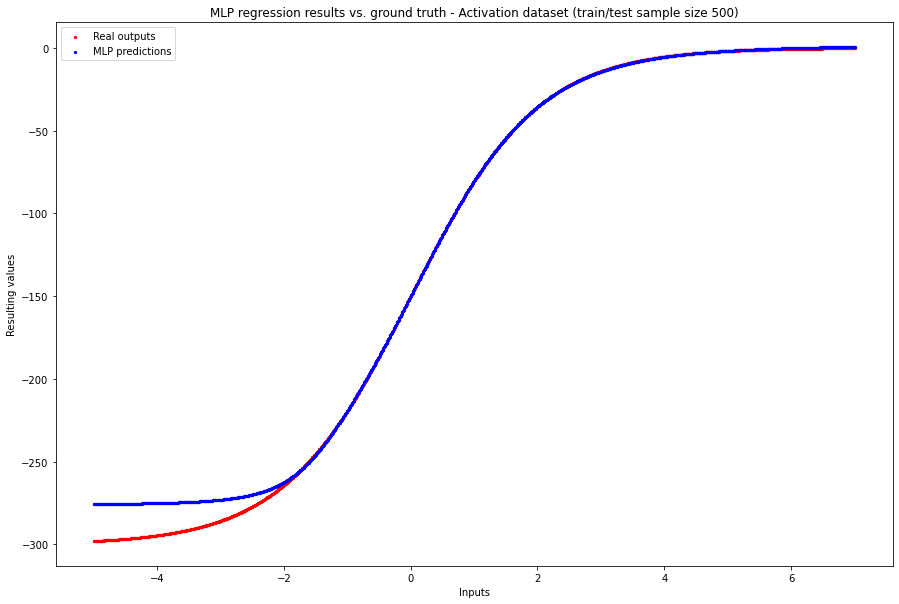

In [6]:
X, Y = read_data(f"{REG}/data.activation.train.{DATASET_SIZE}.csv")
X_test, Y_test = read_data(f"{REG}/data.activation.test.{DATASET_SIZE}.csv")
layers = [
    Layer(in_size=1, out_size=4, activ_function=Sigmoid),
    Layer(in_size=4, out_size=6, activ_function=Sigmoid),
    Layer(in_size=6, out_size=1, activ_function=Linear),
]
print("=======================================================================================")
header = f"Activation dataset (train/test sample size {DATASET_SIZE})"
print(header)
print("=======================================================================================")
m = MLP(
    layers=layers,
    loss=AbsoluteError,
    bias=True,
    batch_size=16,
    epochs=150,
    momentum=0.1,
    learning_rate=0.01,
)
stats = m.train(X,Y, X_test, Y_test)
plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset

Cube dataset (train/test sample size 500)
Epoch   10
 AbsoluteError_train: 41.105
 AbsoluteError_train_std: 38.903
 AbsoluteError_test: 218.675
 AbsoluteError_test_std: 290.203
Epoch   20
 AbsoluteError_train: 26.092
 AbsoluteError_train_std: 32.169
 AbsoluteError_test: 199.440
 AbsoluteError_test_std: 283.174
Epoch   30
 AbsoluteError_train: 19.567
 AbsoluteError_train_std: 25.884
 AbsoluteError_test: 188.519
 AbsoluteError_test_std: 276.038
Epoch   40
 AbsoluteError_train: 17.097
 AbsoluteError_train_std: 21.863
 AbsoluteError_test: 182.203
 AbsoluteError_test_std: 270.445
Epoch   50
 AbsoluteError_train: 15.858
 AbsoluteError_train_std: 19.370
 AbsoluteError_test: 177.802
 AbsoluteError_test_std: 266.212
Epoch   60
 AbsoluteError_train: 15.274
 AbsoluteError_train_std: 17.600
 AbsoluteError_test: 174.594
 AbsoluteError_test_std: 262.922
Epoch   70
 AbsoluteError_train: 15.013
 AbsoluteError_train_std: 16.378
 AbsoluteError_test: 172.170
 AbsoluteError_test_std: 260.358
Epoch   80
 A

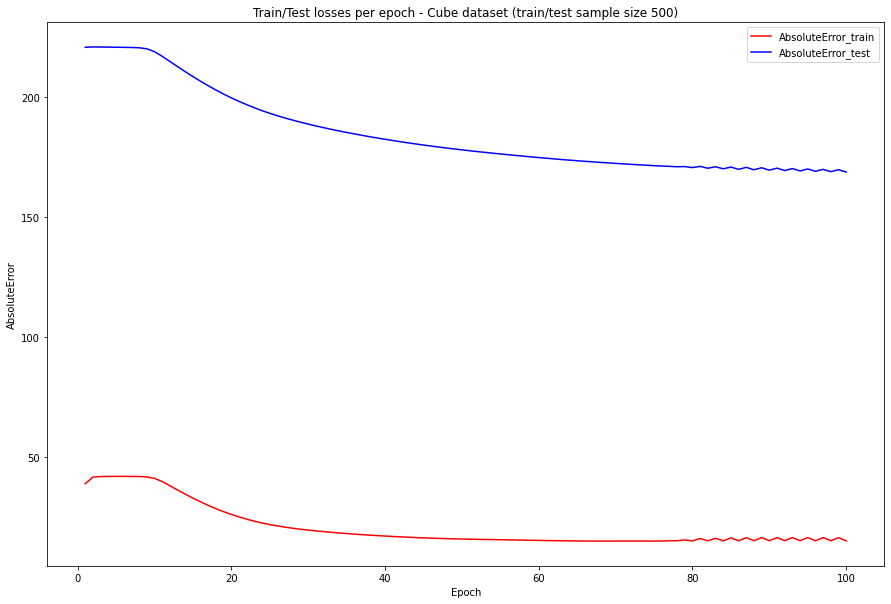

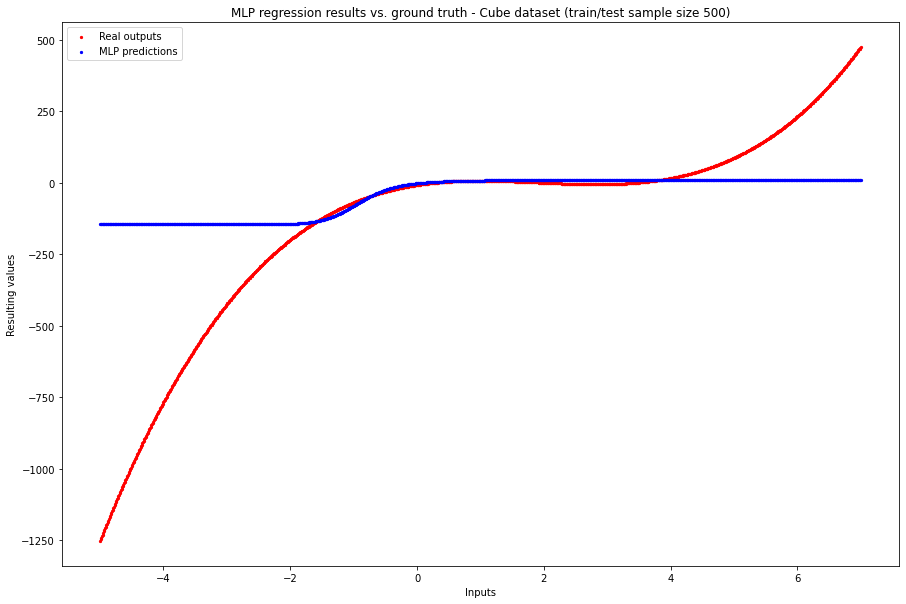

In [7]:
X, Y = read_data(f"{REG}/data.cube.train.{DATASET_SIZE}.csv")
X_test, Y_test = read_data(f"{REG}/data.cube.test.{DATASET_SIZE}.csv")
layers = [
    Layer(in_size=1, out_size=8, activ_function=Sigmoid),
    Layer(in_size=8, out_size=8, activ_function=Sigmoid),
    Layer(in_size=8, out_size=1, activ_function=Linear),
]
print("=======================================================================================")
header = f"Cube dataset (train/test sample size {DATASET_SIZE})"
print(header)
print("=======================================================================================")
m = MLP(
    layers=layers,
    loss=AbsoluteError,
    bias=True,
    batch_size=16,
    epochs=100,
    momentum=0.1,
    learning_rate=0.01,
)
stats = m.train(X,Y, X_test, Y_test)
plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset with normalization

Cube dataset (train/test sample size 500)
Epoch   10
 AbsoluteError_train: 0.126
 AbsoluteError_train_std: 0.000
 AbsoluteError_test: 0.078
 AbsoluteError_test_std: 0.071
Epoch   20
 AbsoluteError_train: 0.117
 AbsoluteError_train_std: 0.000
 AbsoluteError_test: 0.081
 AbsoluteError_test_std: 0.063
Epoch   30
 AbsoluteError_train: 0.118
 AbsoluteError_train_std: 0.000
 AbsoluteError_test: 0.074
 AbsoluteError_test_std: 0.055
Epoch   40
 AbsoluteError_train: 0.117
 AbsoluteError_train_std: 0.000
 AbsoluteError_test: 0.072
 AbsoluteError_test_std: 0.051
Epoch   50
 AbsoluteError_train: 0.115
 AbsoluteError_train_std: 0.000
 AbsoluteError_test: 0.070
 AbsoluteError_test_std: 0.049
Epoch   60
 AbsoluteError_train: 0.114
 AbsoluteError_train_std: 0.000
 AbsoluteError_test: 0.069
 AbsoluteError_test_std: 0.048
Epoch   70
 AbsoluteError_train: 0.111
 AbsoluteError_train_std: 0.000
 AbsoluteError_test: 0.066
 AbsoluteError_test_std: 0.046
Epoch   80
 AbsoluteError_train: 0.111
 AbsoluteError_t

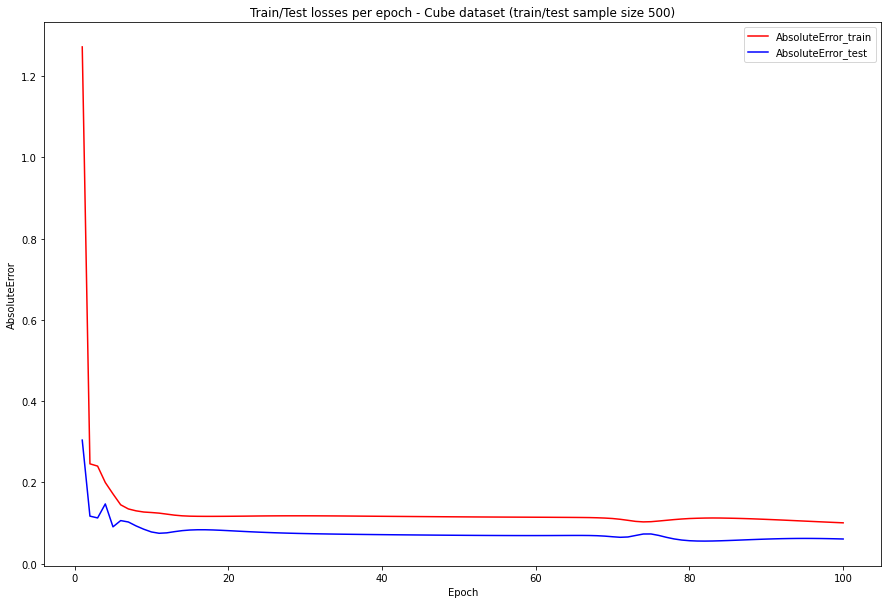

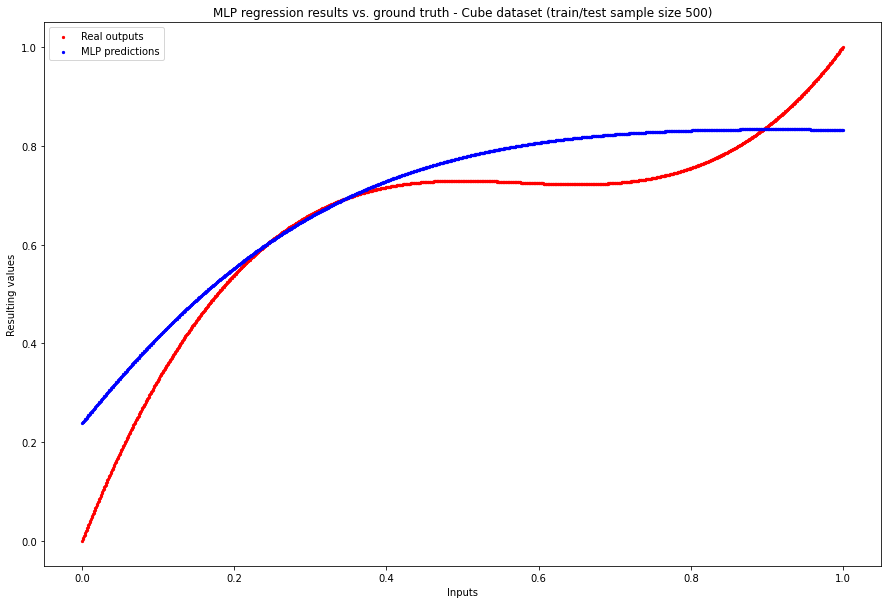

In [8]:
X, Y = read_data(f"{REG}/data.cube.train.{DATASET_SIZE}.csv", normalize_inputs=True)
X_test, Y_test = read_data(f"{REG}/data.cube.test.{DATASET_SIZE}.csv", normalize_inputs=True)
layers = [
    Layer(in_size=1, out_size=8, activ_function=Sigmoid),
    Layer(in_size=8, out_size=8, activ_function=Sigmoid),
    Layer(in_size=8, out_size=1, activ_function=Linear),
]
print("=======================================================================================")
header = f"Cube dataset (train/test sample size {DATASET_SIZE})"
print(header)
print("=======================================================================================")
m = MLP(
    layers=layers,
    loss=AbsoluteError,
    bias=True,
    batch_size=1,
    epochs=100,
    momentum=0.99,
    learning_rate=0.01,
)
stats = m.train(X,Y, X_test, Y_test)
plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")